<a href="https://colab.research.google.com/github/ehtishamzaki/DeepLearning_ComputerVision/blob/master/COVID_20_Analysis%2C_Viz%2C_Prediction_%26_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corona Virus

* Coronaviruses are **zoonotic** viruses (means transmitted between animals and people).  
* Symptoms include from fever, cough, respiratory symptoms, and breathing difficulties. 
* In severe cases, it can cause pneumonia, severe acute respiratory syndrome (SARS), kidney failure and even death.

* A **novel coronavirus (nCoV)** is a new strain that has not been previously identified in humans.

# COVID-19

* Corona Virus Disease 2019
* Caused by a **SARS-COV-2** corona virus.  
* First identified in **Wuhan, Hubei, China**.  
* Earliest reported symptoms occurred on **1 December 2019**. 
* First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals. 
* On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern 

# Libraries

### Install

In [1]:
# install calmap
! pip install calmap

### Import

In [0]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display, HTML

# Dataset

In [3]:
# list files
!ls ../input/corona-virus-report

ls: cannot access '../input/corona-virus-report': No such file or directory


In [6]:
# importing datasets
full_table = pd.read_csv('covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
10960,NaN,Reunion,-21.1151,55.5364,2020-03-12,1,0,0
10961,NaN,Turkey,38.9637,35.2433,2020-03-12,1,0,0
10962,Gibraltar,United Kingdom,36.1408,-5.3536,2020-03-12,1,0,1
10963,NaN,Cuba,22.0000,-80.0000,2020-03-12,3,0,0
10964,NaN,Guyana,5.0000,-58.7500,2020-03-12,1,1,0


In [10]:


full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10965 entries, 0 to 10964
Data columns (total 8 columns):
Province/State    5457 non-null object
Country/Region    10965 non-null object
Lat               10965 non-null float64
Long              10965 non-null float64
Date              10965 non-null datetime64[ns]
Confirmed         10965 non-null int64
Deaths            10965 non-null int64
Recovered         10965 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 685.4+ KB


In [11]:
# checking for missing value
 full_table.isna().sum()

Province/State    5508
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

# Preprocessing

### Cleaning Data

In [0]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

### Derived Tables

In [0]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Province/State'].str.contains('Diamond Princess cruise ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# Latest Data

### Latest Complete Data

In [0]:
temp = full_table.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
# temp.style.background_gradient(cmap='Reds')

### Latest Condensed Data

In [17]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-12 00:00:00,128343,4720,68324,55299


In [20]:
tm = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
fig = px.treemap(tm, values="value", height=400, width=600,
                 color_discrete_sequence=[rec, act, dth])
fig.show()

# Country wise Data

### In each country

In [21]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,China,80932,3172,62901,14859
1,Italy,12462,827,1045,10590
2,Iran,10075,429,2959,6687
3,"Korea, South",7869,66,333,7470
4,France,2284,48,12,2224
5,Spain,2277,55,183,2039
6,Germany,2078,3,25,2050
7,US,1663,40,12,1611
8,Norway,702,0,1,701
9,Cruise Ship,696,7,325,364


### Countries with deaths reported

In [22]:
temp_flg = temp_f[temp_f['Deaths']>0][['Country/Region', 'Deaths']]
temp_flg.sort_values('Deaths', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Country/Region,Deaths
0,China,3172
1,Italy,827
2,Iran,429
3,"Korea, South",66
4,Spain,55
5,France,48
6,US,40
7,Japan,16
8,Iraq,8
9,United Kingdom,8


### Countries with no cases recovered

In [23]:
temp = temp_f[temp_f['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp.reset_index(drop=True).style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,Netherlands,503,5,0
1,Qatar,262,0,0
2,Greece,99,1,0
3,Czechia,94,0,0
4,Slovenia,89,0,0
5,San Marino,69,3,0
6,Portugal,59,0,0
7,Brazil,52,0,0
8,Poland,49,1,0
9,Ireland,43,1,0


### Countries with all cases died

In [24]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Deaths']]
temp = temp[['Country/Region', 'Confirmed', 'Deaths']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths
0,Guyana,1,1


### Countries with all the cases recovered

In [25]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered
0,Andorra,1,1
1,Nepal,1,1


### Countries with no affected case anymore

In [26]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Deaths']+
                          row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Deaths,Recovered
0,Andorra,1,0,1
1,Guyana,1,1,0
2,Nepal,1,0,1


# Chinese province wise data

### In each provinces

In [27]:
temp_f = china_latest_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67781,3056,50318
1,Guangdong,1356,8,1289
2,Henan,1273,22,1249
3,Zhejiang,1215,1,1197
4,Hunan,1018,4,999
5,Anhui,990,6,984
6,Jiangxi,935,1,934
7,Shandong,760,6,734
8,Jiangsu,631,0,629
9,Chongqing,576,6,564


### Provinces with no cases recovered

In [28]:
temp = china_latest_grouped[china_latest_grouped['Recovered']==0]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered


### Provinces with all cases died

In [29]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Deaths']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered


### Provinces with all the cases recovered

In [30]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed','Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered
0,Qinghai,18,0,18
1,Macau,10,0,10
2,Tibet,1,0,1


### Provinces with no affected cases anymore

In [31]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Deaths']+
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,990,6,984
1,Jiangxi,935,1,934
2,Fujian,296,1,295
3,Xinjiang,76,3,73
4,Qinghai,18,0,18
5,Macau,10,0,10
6,Tibet,1,0,1


# Maps

### Across the world

In [33]:
# World wide

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(full_latest)):
    folium.Circle(
        location=[full_latest.iloc[i]['Lat'], full_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(full_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(full_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(full_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(full_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(full_latest.iloc[i]['Recovered']),
        radius=int(full_latest.iloc[i]['Confirmed'])**1.1).add_to(m)
m

In [34]:
# Confirmed

fig = px.choropleth(full_latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [35]:
# Deaths

fig = px.choropleth(full_latest_grouped[full_latest_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [0]:
# # China

# clg = china_latest_grouped.iloc[:, :].copy()

# name = {'Inner Mongolia': 'Inner Mongol',
#         'Tibet': 'Xizang'}
# clg.loc[:, 'Province/State'] = clg.loc[: 'Province/State'].replace(name)

# with urlopen('https://raw.githubusercontent.com/yg2619/Choropleth-Maps-in-Python-Using-Plotly/master/china_geojson.json') as file:
#     china_json = json.load(file)

# fig = go.Figure(go.Choroplethmapbox(geojson=china_json, locations=clg['Province/State'], 
#                                     z=china_latest_grouped['Confirmed'], colorscale='Viridis', zmin=0, zmax=1000,
#                                     marker_opacity=0.8, marker_line_width=0))
# fig.update_layout(mapbox_style="carto-positron",
#                   mapbox_zoom=3, mapbox_center = {"lat": 35.8617, "lon": 104.1954})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_layout(title='Confirmed Cases in Chinese Provincec')
# fig.show()

# -----------------------------------------------------------------------------------------------------------------

# # US

# temp = full_latest.loc[full_latest['Country/Region']=='US', ['Province/State', 'Confirmed']]
# temp['State'] = temp.loc[:, 'Province/State'].str.split(', ').str[-1]
# temp = temp.groupby('State')['Confirmed'].sum().reset_index()

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

# fig = go.Figure(go.Choropleth(locations=temp['State'], z = temp['Confirmed'].astype(float), 
#                               locationmode = 'USA-states', colorscale = 'Viridis'))
# fig.update_layout(geo_scope='usa', title='Confirmed Cases in US States')
# fig.show()

In [36]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# Ships

### Diamond Princess cruise ship

* On *20 January 2020*, an 80-year-old passenger from Hong Kong embarked in **Yokohama**, later tested positive for COVID-19 on *1 February*.    
* On *4 February*, the ship was in Japanese waters when **10 passengers were diagnosed with COVID-19**. 
* The **ship was quarantined** on *4 February 2020* in the **Port of Yokohama in Japan**. 
>* The infections included at least 138 from India (including 132 crew and 6 passengers), 35 Filipinos, 
>* 32 Canadians, 24 Australians, 13 Americans, 4 Indonesians, 4 Malaysians,and 2 Britons. 

* Home countries arranged to evacuate their citizens and quarantine them further in their own countries.
* As of *5 March*, **at least 696** out of the 3,711 passengers and crew had **tested positive** for the virus.
* As of *7 March*, there had been **at least 7 deaths**

### Grand Princess Ship

* Another **Grand-class ship owned by Princess Cruises**, also experienced an outbreak of the disease
* **Two of its passengers** fell ill after a cruise **from San Francisco to Mexico** in February 2020, and one of them died

In [37]:
# Latest cases from the ships
temp = ship[ship['Date']==max(ship['Date'])]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered
0,Grand Princess,21,0,0


In [38]:
temp = ship[ship['Date']==max(ship['Date'])]

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(temp.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(temp.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(temp.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(temp.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(temp.iloc[i]['Recovered']),
        radius=100000).add_to(m)
m

# Cases over the time

In [39]:
temp = full_table.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.show()

# Recovery and mortality rate over time

In [40]:
temp = full_table.groupby('Date').sum().reset_index()

# adding two more columns
temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/temp['Confirmed'], 3)*100
temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/temp['Confirmed'], 3)*100
# temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/temp['Deaths'], 3)

temp = temp.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                 var_name='Ratio', value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over The Time', color_discrete_sequence=[dth, rec])
fig.show()

# No. of places to which COVID-19 spread

In [41]:
c_spread = china[china['Confirmed']!=0].groupby('Date')['Province/State'].unique().apply(len)
c_spread = pd.DataFrame(c_spread).reset_index()

fig = px.line(c_spread, x='Date', y='Province/State', text='Province/State',
              title='Number of Provinces/States/Regions of China to which COVID-19 spread over the time',
             color_discrete_sequence=[cnf,dth, rec])
fig.update_traces(textposition='top center')
fig.show()

# ------------------------------------------------------------------------------------------

spread = full_table[full_table['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len)
spread = pd.DataFrame(spread).reset_index()

fig = px.line(spread, x='Date', y='Country/Region', text='Country/Region',
              title='Number of Countries/Regions to which COVID-19 spread over the time',
             color_discrete_sequence=[cnf,dth, rec])
fig.update_traces(textposition='top center')
fig.show()

# Top 20 Countries

In [42]:
flg = full_latest_grouped
flg.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,7,0,0,7
1,Albania,23,1,0,22
2,Algeria,24,1,8,15
3,Andorra,1,0,1,0
4,Argentina,19,1,0,18


In [43]:
fig = px.bar(flg.sort_values('Confirmed', ascending=False).head(20).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="Country/Region", title='Confirmed Cases', text='Confirmed', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Confirmed'])+10000])
fig.update_traces(marker_color=cnf, opacity=0.6, textposition='outside')
fig.show()

In [44]:
fig = px.bar(flg.sort_values('Deaths', ascending=False).head(20).sort_values('Deaths', ascending=True), 
             x="Deaths", y="Country/Region", title='Deaths', text='Deaths', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Deaths'])+500])
fig.update_traces(marker_color=dth, opacity=0.6, textposition='outside')
fig.show()

In [45]:
fig = px.bar(flg.sort_values('Recovered', ascending=False).head(20).sort_values('Recovered', ascending=True), 
             x="Recovered", y="Country/Region", title='Recovered', text='Recovered', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Recovered'])+10000])
fig.update_traces(marker_color=rec, opacity=0.6, textposition='outside')
fig.show()

In [46]:
fig = px.bar(flg.sort_values('Active', ascending=False).head(20).sort_values('Active', ascending=True), 
             x="Active", y="Country/Region", title='Active', text='Active', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Active'])+3000])
fig.update_traces(marker_color=act, opacity=0.6, textposition='outside')
fig.show()

In [47]:
# (Only countries with more than 100 case are considered)

flg['Mortality Rate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('Mortality Rate', ascending=False)

fig = px.bar(temp.sort_values('Mortality Rate', ascending=False).head(15).sort_values('Mortality Rate', ascending=True), 
             x="Mortality Rate", y="Country/Region", text='Mortality Rate', orientation='h', 
             width=700, height=600, range_x = [0, 8], title='No. of Deaths Per 100 Confirmed Case')
fig.update_traces(marker_color=act, opacity=0.6, textposition='outside')
fig.show()

In [51]:
# load population dataset
pop_clean_data = pd.read_csv("population_clean.csv")

# select only the latest data
pop = pop_clean_data.loc[:, ['Country Name', '2018']]

# substitute for missing values
cols = ['French Guiana', 'Martinique', 'Palestine' , 'Republic of Ireland', 'Saint Barthelemy', 'Taiwan', 'Vatican City']
pops = [290691, 376480, 4750000, 4920455, 7122, 23476640, 1000]
for c, p in zip(cols, pops):
    temp.loc[temp['Country/Region']== c, 'Population'] = p

# replace country names 
name = {
    'Egypt, Arab Rep.': 'Egypt',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'Macao SAR, China': 'Macau',
    'Hong Kong SAR': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Korea, Rep.': 'Republic of Korea',
    'United Kingdom': 'UK',
    'United States': 'US' }
pop.loc[:, 'Country Name'] = pop.loc[: 'Country Name'].replace(name)

# merge dataframes
temp = pd.merge(full_latest_grouped, pop, how='left', right_on='Country Name', left_on='Country/Region')
# print(temp[temp['Country Name'].isna()])

temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', '2018']]
temp.columns = ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
    
# calculate Confirmed/Population
temp['Confirmed Per Million People'] = round(temp['Confirmed']/temp['Population']*1000000, 2)

# countries with population greater that 1 million only
temp = temp[temp['Population']>1000000].sort_values('Confirmed Per Million People', ascending=False).reset_index(drop=True)
# temp.head()

fig = px.bar(temp.head(20).sort_values('Confirmed Per Million People', ascending=True), 
             x='Confirmed Per Million People', y='Country/Region', orientation='h', 
             width=700, height=700, text='Confirmed Per Million People', title='Confirmed cases Per Million People',
             range_x = [0, max(temp['Confirmed Per Million People'])+20])
fig.update_traces(textposition='outside', marker_color=dth, opacity=0.7)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

ValueError: ignored

# Date vs

In [52]:
temp = full_table.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region', orientation='v', height=600,
             title='Confirmed', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [53]:
fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region', orientation='v', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [54]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region',title='New cases')
fig.show()

https://app.flourish.studio/visualisation/1571387/edit



In [55]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [0]:
# temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()
# temp = temp.sort_values('Confirmed').reset_index(drop=True).head(20)
# # temp['Date'] = temp['Date'].dt.strftime('%Y-%m-%d')
# temp = temp.sort_values(by='Date')
# temp['Date'] = temp['Date'].apply(lambda x: x.date()).apply(str)
# temp.head()

# fig = px.bar(temp, y='Country/Region', x='Confirmed', color='Country/Region', orientation='h',  
#              title='Over time', animation_frame='Date', height=1000, log_x=True)
# # fig.update_traces(textposition='outside')
# # fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# # fig.update_layout(yaxis={'categoryorder':'array', 
# #                          'categoryarray':['Hubei','Other Chinese Provinces','Rest of the World']})
# fig.show()

In [0]:
temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

px.line(temp, x="Date", y="Confirmed", color='Country/Region', title='Cases Spread', height=600)

# Composition of Cases

In [56]:
fig = px.treemap(full_latest.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country/Region", "Province/State"], values="Confirmed", height=700,
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(full_latest.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country/Region", "Province/State"], values="Deaths", height=700,
                 title='Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

TypeError: ignored

# Epidemic Span

Note : In the graph, last day is shown as one day after the last time a new confirmed cases reported in the Country / Region

In [57]:
# first date
# ----------
first_date = full_table[full_table['Confirmed']>0]
first_date = first_date.groupby('Country/Region')['Date'].agg(['min']).reset_index()
# first_date.head()
from datetime import timedelta  
# last date
# ---------
last_date = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
last_date = last_date.sum().diff().reset_index()

mask = last_date['Country/Region'] != last_date['Country/Region'].shift(1)
last_date.loc[mask, 'Confirmed'] = np.nan
last_date.loc[mask, 'Deaths'] = np.nan
last_date.loc[mask, 'Recovered'] = np.nan

last_date = last_date[last_date['Confirmed']>0]
last_date = last_date.groupby('Country/Region')['Date'].agg(['max']).reset_index()
# last_date.head()

# first_last
# ----------
first_last = pd.concat([first_date, last_date[['max']]], axis=1)

# added 1 more day, which will show the next day as the day on which last case appeared
first_last['max'] = first_last['max'] + timedelta(days=1)

# no. of days
first_last['Days'] = first_last['max'] - first_last['min']

# task column as country
first_last['Task'] = first_last['Country/Region']

# rename columns
first_last.columns = ['Country/Region', 'Start', 'Finish', 'Days', 'Task']

# sort by no. of days
first_last = first_last.sort_values('Days')
# first_last.head()

# visualization
# --------------

# produce random colors
clr = ["#"+''.join([random.choice('0123456789ABC') for j in range(6)]) for i in range(len(first_last))]

#plot
fig = ff.create_gantt(first_last, index_col='Country/Region', colors=clr, show_colorbar=False, 
                      bar_width=0.2, showgrid_x=True, showgrid_y=True, height=1600, 
                      title=('Gantt Chart'))
fig.show()

# China vs ROW

In [58]:
# In China
temp = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='In China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.show()

#-----------------------------------------------------------------------------

# ROW
temp = row.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.show()

In [59]:
def from_china_or_not(row):
    if row['Country/Region']=='China':
        return 'From China'
    else:
        return 'Outside China'
    
temp = full_table.copy()
temp['Region'] = temp.apply(from_china_or_not, axis=1)
temp = temp.groupby(['Region', 'Date'])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Region'] != temp['Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x='Date', y='Confirmed', color='Region', barmode='group', 
             text='Confirmed', title='Confirmed', color_discrete_sequence= [cnf, dth, rec])
fig.update_traces(textposition='outside')
fig.show()

fig = px.bar(temp, x='Date', y='Deaths', color='Region', barmode='group', 
             text='Confirmed', title='Deaths', color_discrete_sequence= [cnf, dth, rec])
fig.update_traces(textposition='outside')
fig.update_traces(textangle=-90)
fig.show()

In [0]:
# fig = px.bar(temp[temp['Country/Region']!='China'], x="Date", y="Confirmed", color='Country/Region',
#              title='Number of new cases outside China everyday')
# fig.show()

# fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region',
#              title='Number of new death case reported outside China everyday')
# fig.show()

# fig = px.bar(temp[temp['Country/Region']!='China'], x="Date", y="Deaths", color='Country/Region',
#              title='Number of new death case reported outside China everyday')
# fig.show()

In [60]:
gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
gdf = gdf.reset_index()

temp = gdf[gdf['Country/Region']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='China', color_discrete_sequence=[cnf, dth, rec])
fig.show()

temp = gdf[gdf['Country/Region']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='ROW', color_discrete_sequence=[cnf, dth, rec])
fig.show()

# Hubei - China - World

In [61]:
def location(row):
    if row['Country/Region']=='China':
        if row['Province/State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese Provinces'
    else:
        return 'Rest of the World'

temp = full_table.copy()
temp['Region'] = temp.apply(location, axis=1)
temp['Date'] = temp['Date'].dt.strftime('%Y-%m-%d')
temp = temp.groupby(['Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars=['Region', 'Date'], value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
# temp = temp.sort_values(['Date', 'Region', 'Case']).reset_index()
temp.head()

fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             text='Count', title='Hubei - China - World', animation_frame='Date',
             color_discrete_sequence= [dth, rec, cnf], range_x=[0, 70000])
fig.update_traces(textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.update_layout(yaxis={'categoryorder':'array', 
#                          'categoryarray':['Hubei','Other Chinese Provinces','Rest of the World']})
fig.show()

temp = full_latest.copy()
temp['Region'] = temp.apply(location, axis=1)
temp = temp.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars='Region', value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
temp.head()

fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             text='Count', title='Hubei - China - World', 
             color_discrete_sequence= [dth, rec, cnf])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

ValueError: ignored

# Proportion of Cases

In [62]:
rl = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum()
rl = rl.reset_index().sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
rl.head().style.background_gradient(cmap='rainbow')

ncl = rl.copy()
ncl['Affected'] = ncl['Confirmed'] - ncl['Deaths'] - ncl['Recovered']
ncl = ncl.melt(id_vars="Country/Region", value_vars=['Affected', 'Recovered', 'Deaths'])

fig = px.bar(ncl.sort_values(['variable', 'value']), 
             x="Country/Region", y="value", color='variable', orientation='v', height=800,
             title='Number of Cases outside China', color_discrete_sequence=[act, dth, rec])
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# ------------------------------------------

cl = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum()
cl = cl.reset_index().sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
# cl.head().style.background_gradient(cmap='rainbow')

ncl = cl.copy()
ncl['Affected'] = ncl['Confirmed'] - ncl['Deaths'] - ncl['Recovered']
ncl = ncl.melt(id_vars="Province/State", value_vars=['Affected', 'Recovered', 'Deaths'])

fig = px.bar(ncl.sort_values(['variable', 'value']), 
             y="Province/State", x="value", color='variable', orientation='h', height=800,
             title='Number of Cases in China', color_discrete_sequence=[act, dth, rec])
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

ValueError: ignored

In [0]:
# fig = px.treemap(china_latest.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
#                  path=["Province/State"], values="Confirmed",
#                  title='Number of Confirmed Cases in Chinese Provinces',
#                  color_discrete_sequence = px.colors.qualitative.Prism)
# fig.show()

# fig = px.treemap(china_latest.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
#                  path=["Province/State"], values="Deaths", 
#                  title='Number of Deaths Reported in Chinese Provinces',
#                  color_discrete_sequence = px.colors.qualitative.Prism)
# fig.show()

# fig = px.treemap(china_latest.sort_values(by='Recovered', ascending=False).reset_index(drop=True), 
#                  path=["Province/State"], values="Recovered", 
#                  title='Number of Recovered Cases in Chinese Provinces',
#                  color_discrete_sequence = px.colors.qualitative.Prism)
# fig.show()

# # ----------------------------------------------------------------------------

# fig = px.treemap(row_latest, path=["Country/Region"], values="Confirmed", 
#                  title='Number of Confirmed Cases outside china',
#                  color_discrete_sequence = px.colors.qualitative.Pastel)
# fig.show()

# fig = px.treemap(row_latest, path=["Country/Region"], values="Deaths", 
#                  title='Number of Deaths outside china',
#                  color_discrete_sequence = px.colors.qualitative.Pastel)
# fig.show()

# fig = px.treemap(row_latest, path=["Country/Region"], values="Recovered", 
#                  title='Number of Recovered Cases outside china',
#                  color_discrete_sequence = px.colors.qualitative.Pastel)
# fig.show()

# Country Wise

### Confirmed cases

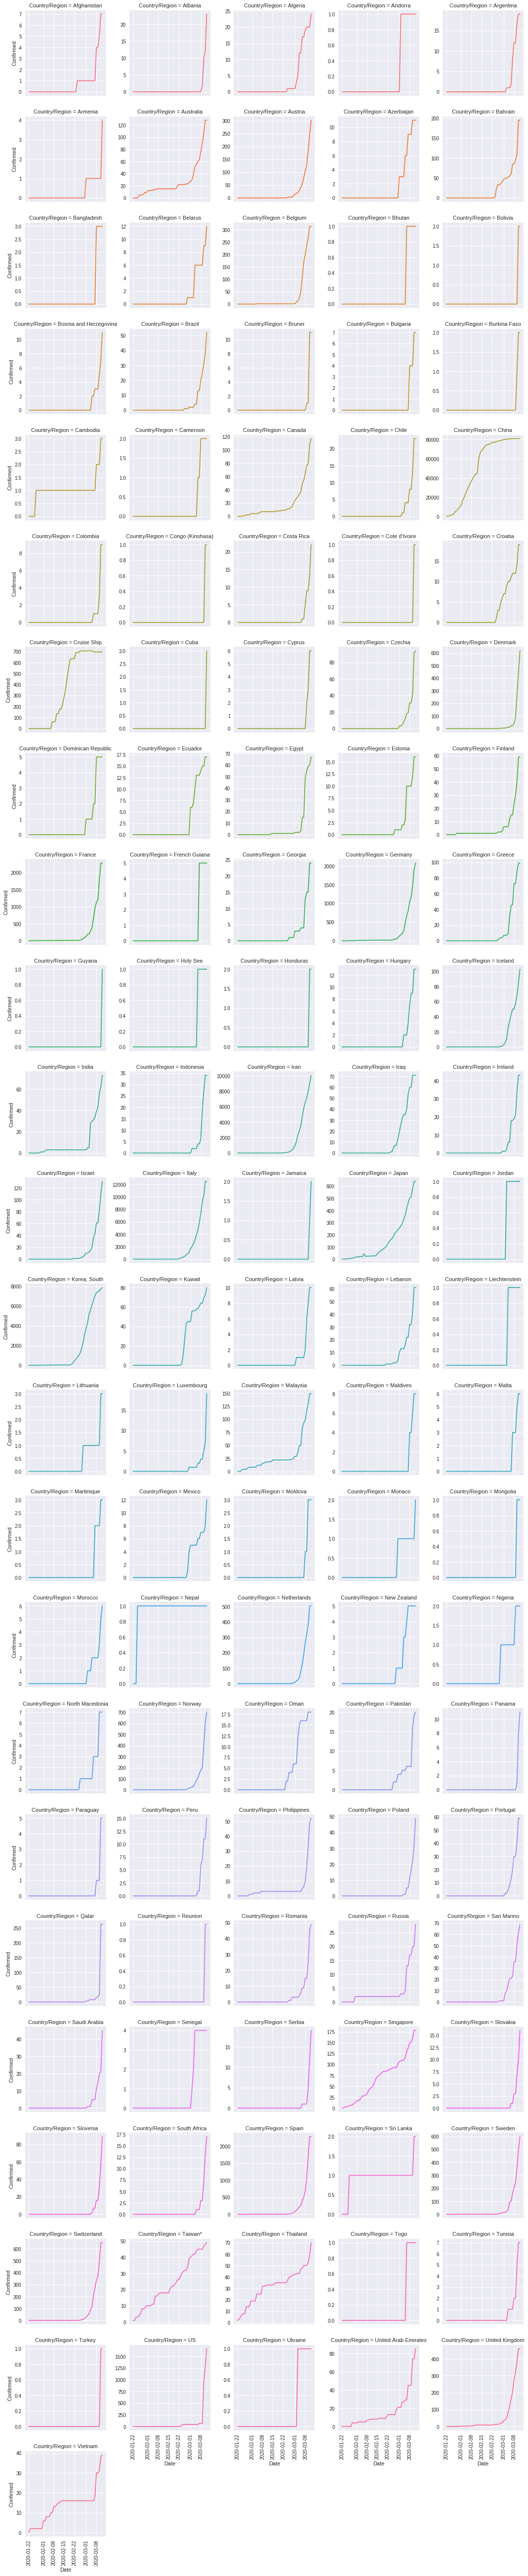

In [64]:
temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country/Region'])

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

### New cases

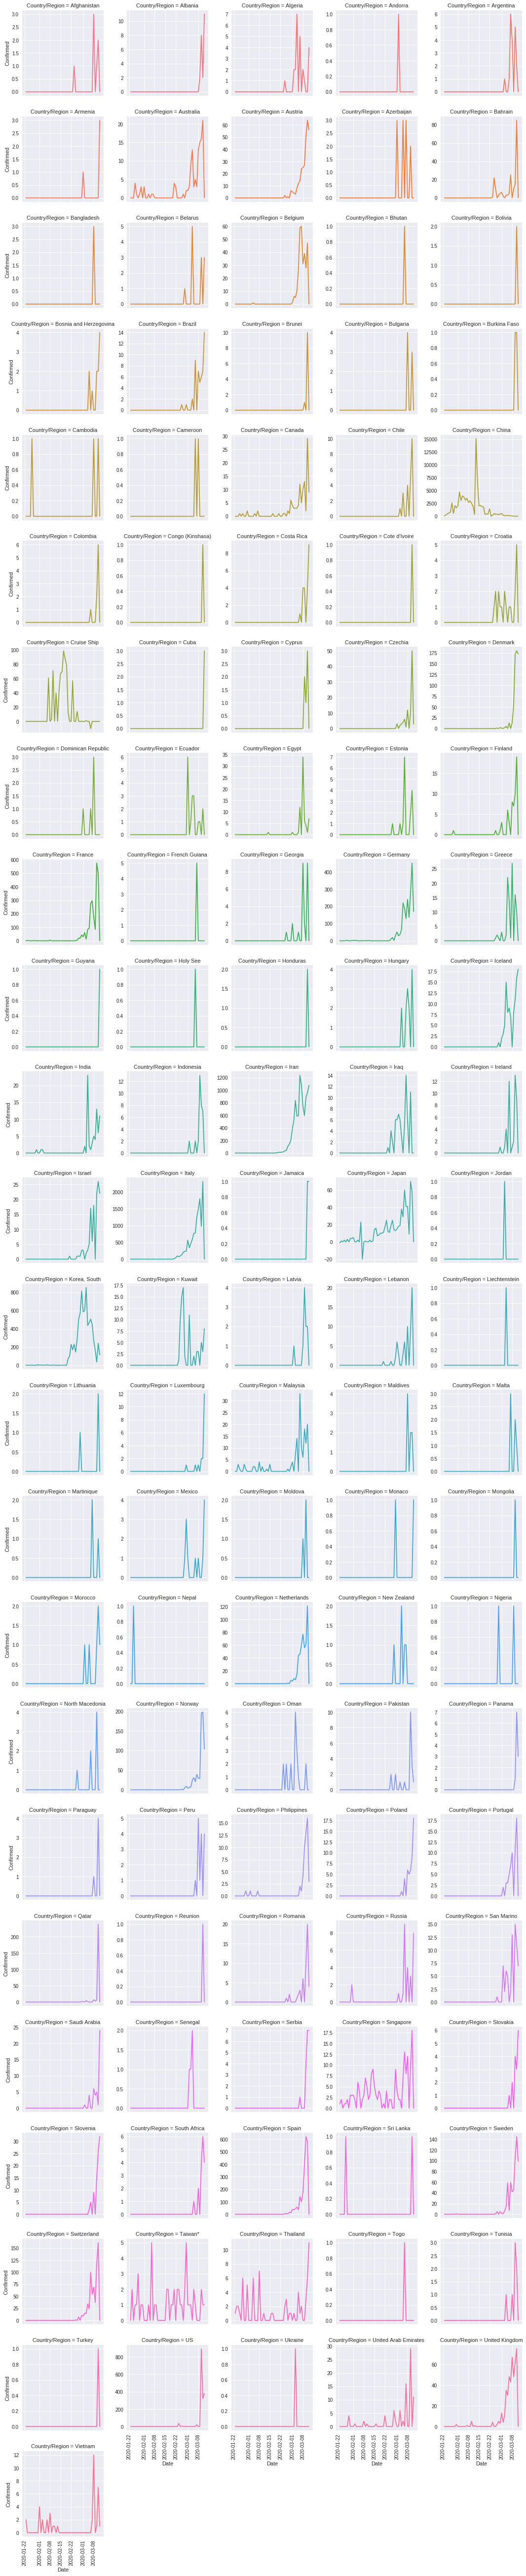

In [65]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

# Calander map

### Number of new cases every day

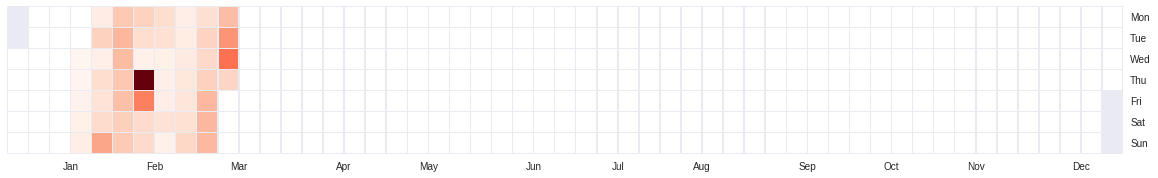

In [66]:
temp = full_table.groupby('Date')['Confirmed'].sum()
temp = temp.diff()

plt.figure(figsize=(20, 5))
ax = calmap.yearplot(temp, fillcolor='white', cmap='Reds', linewidth=0.5)

### Number of new countries every day

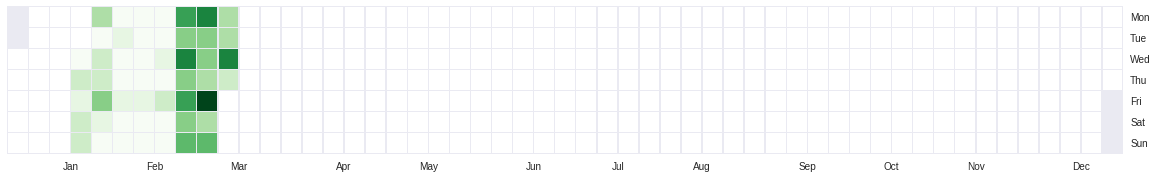

In [67]:
spread = full_table[full_table['Confirmed']!=0].groupby('Date')
spread = spread['Country/Region'].unique().apply(len).diff()

plt.figure(figsize=(20, 5))
ax = calmap.yearplot(spread, fillcolor='white', cmap='Greens', linewidth=0.5)

# Comparison with other epidemics

https://www.kaggle.com/imdevskp/covid19-vs-sars-vs-mers-vs-ebola-vs-h1n1



In [68]:
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2012, 2009],
    'end_year' : [2020, 2004, 2016, 2017, 2010],
    'confirmed' : [full_latest['Confirmed'].sum(), 8096, 28646, 2494, 6724149],
    'deaths' : [full_latest['Deaths'].sum(), 774, 11323, 858, 19654]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)

epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,mortality
0,COVID-19,2019,2020,128343,4720,3.68
1,SARS,2003,2004,8096,774,9.56
2,EBOLA,2014,2016,28646,11323,39.53
3,MERS,2012,2017,2494,858,34.40
4,H1N1,2009,2010,6724149,19654,0.29


In [69]:
temp = epidemics.melt(id_vars='epidemic', value_vars=['confirmed', 'deaths', 'mortality'],
                      var_name='Case', value_name='Value')

fig = px.bar(temp, x="epidemic", y="Value", color='epidemic', text='Value', facet_col="Case",
             color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_yaxes(showticklabels=False)
fig.layout.yaxis2.update(matches=None)
fig.layout.yaxis3.update(matches=None)
fig.show()

ValueError: ignored

# Analysis on other epidemics

https://www.kaggle.com/imdevskp/mers-outbreak-analysis  
https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis  
https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis
